In [25]:
import sys
sys.path.insert(0, "../lib")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def get_accuracy(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    metrics= y_real==y_pred
    accuracy =(np.sum(metrics)*100.0)/len(metrics)
    #print "accruracy "+"{:10.4f}".format(accuracy) +"%"
    return "{:10.4f}".format(accuracy)+"%"


In [114]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def get_precision(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(precision_score(y_real,y_pred,average='micro'))

def get_recall(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(recall_score(y_real,y_pred,average='micro'))

def get_fscore(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return " "+"{:10.4f}".format(f1_score(y_real, y_pred, average='micro'))

def get_confusion_matrix(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    return confusion_matrix(np.array(y_real),np.array(y_pred))

def get_accuracy_scikit_learn(y):
    y_real=y[:,0]
    y_pred=y[:,1]
    print accuracy_score(y_real, y_pred)


In [35]:
import pickle
path="/Users/luispeinado/Downloads/evaluate_seq2_vs_all.pkl"
data_evaluate2= pickle.load( open( path, "rb" ) )


def load_result(path):
    return pickle.load( open( path, "rb" ) )

In [18]:
seq_model_label=['seq2_model']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

model secuence1
 seq1:    32.6078% precision :      0.3261 recall      0.3261


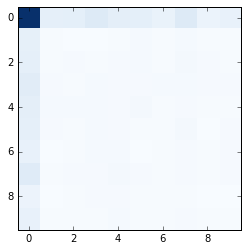

In [113]:
len_data_evaluate_model=len(data_evaluate2)



for i in range(0,len_data_evaluate_model):
    len_dataset_evaluate=len(data_evaluate2[i])
    seq_for_model=data_evaluate2[i]
    print "model "+seq_model_label[i]
    result_line=""
    for j in range(0,len_dataset_evaluate):
        result_line=" "+seq_dataset_label[j]+": "+(get_accuracy(np.array(seq_for_model[j])))+" precision : "+(get_precision(np.array(seq_for_model[j])))+" recall "+(get_recall(np.array(seq_for_model[j])))
        get_fscore(np.array(seq_for_model[j]))
        print result_line
        get_accuracy_scikit_learn(np.array(seq_for_model[j]))
        confusion_matrix= get_confusion_matrix(np.array(seq_for_model[j]))
        
        plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

In [121]:
def evaluate(data_evaluate2,seq_model_label,seq_dataset_label,labels):
    len_data_evaluate_model=len(data_evaluate2)
    for i in range(0,len_data_evaluate_model):
        len_dataset_evaluate=len(data_evaluate2[i])
        seq_for_model=data_evaluate2[i]
        print "model "+seq_model_label[i]
        result_line=""
        fig =plt.figure(figsize=(12,12 ))
        fig.suptitle('Model Training with '+seq_model_label[i], fontsize=12, fontweight='bold')
        for j in range(0,len_dataset_evaluate):
            result_line=" "+seq_dataset_label[j]+": "+(get_accuracy(np.array(seq_for_model[j])))+" precision : "+(get_precision(np.array(seq_for_model[j])))+" recall "+(get_recall(np.array(seq_for_model[j]))) +" f1_score "+(get_fscore(np.array(seq_for_model[j])))
            print result_line
            get_accuracy_scikit_learn(np.array(seq_for_model[j]))
            confusion_matrix= get_confusion_matrix(np.array(seq_for_model[j])) 
            plt.subplot(3,3,j+1)
            plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
            tick_marks = np.arange(len(labels))
            plt.xticks(tick_marks, labels, rotation=90)
            plt.yticks(tick_marks, labels)
            plt.title(seq_dataset_label[j])
            plt.subplots_adjust(top=1.2)
            plt.tight_layout()


# 1 experimento todos contra todos 
## 1.1 size of batch 25 
Se testean todos las secuencias contra todas las secuencias con un batch de 25 

In [83]:
### labels

class_labels=['Corridor','Hall','ProfessorOffice','StudentOffice','TechnicalRoom','Toilet'
              ,'SecretaryOffice','VideoConferenceRoom','Warehouse','ElevatorArea']
              

In [65]:
path="../data/results/evaluate_all_vs_all.pkl"
Y= load_result(path)
type(Y)

numpy.ndarray

model secuence1
 seq1:    27.2918% precision :      0.2729 recall      0.2729 f1_score      0.2729
0.272917538719
 seq2:    26.7307% precision :      0.2673 recall      0.2673 f1_score      0.2673
0.26730727233
 seq3:    27.2687% precision :      0.2727 recall      0.2727 f1_score      0.2727
0.27268683274
 seq4:    26.4401% precision :      0.2644 recall      0.2644 f1_score      0.2644
0.264401160381
 seq5:    17.6771% precision :      0.1768 recall      0.1768 f1_score      0.1768
0.176771279125
model secuence2
 seq1:    32.5241% precision :      0.3252 recall      0.3252 f1_score      0.3252
0.32524068648
 seq2:    33.0421% precision :      0.3304 recall      0.3304 f1_score      0.3304
0.330421489408
 seq3:    29.8043% precision :      0.2980 recall      0.2980 f1_score      0.2980
0.298042704626
 seq4:    32.0763% precision :      0.3208 recall      0.3208 f1_score      0.3208
0.320762536262
 seq5:    20.5540% precision :      0.2055 recall      0.2055 f1_score      0.2055
0.2055

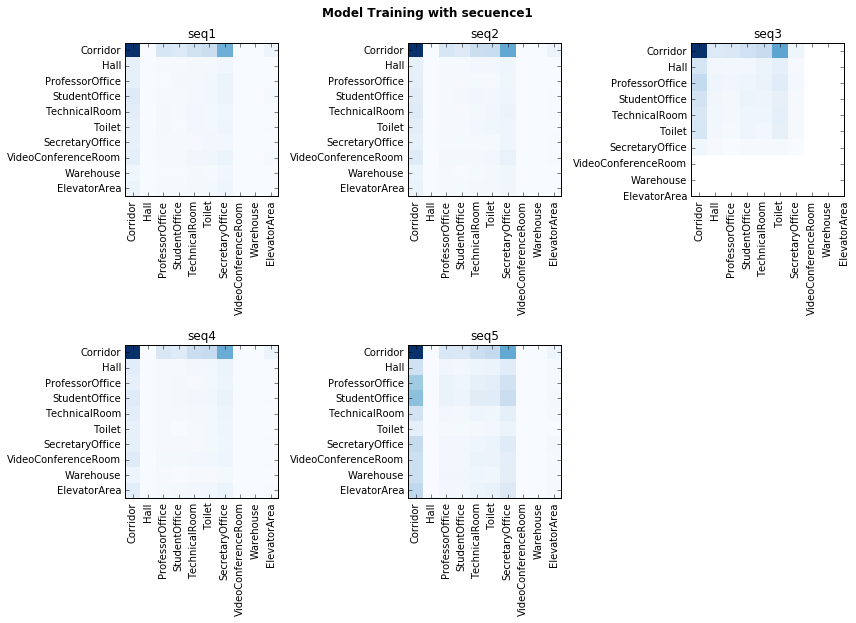

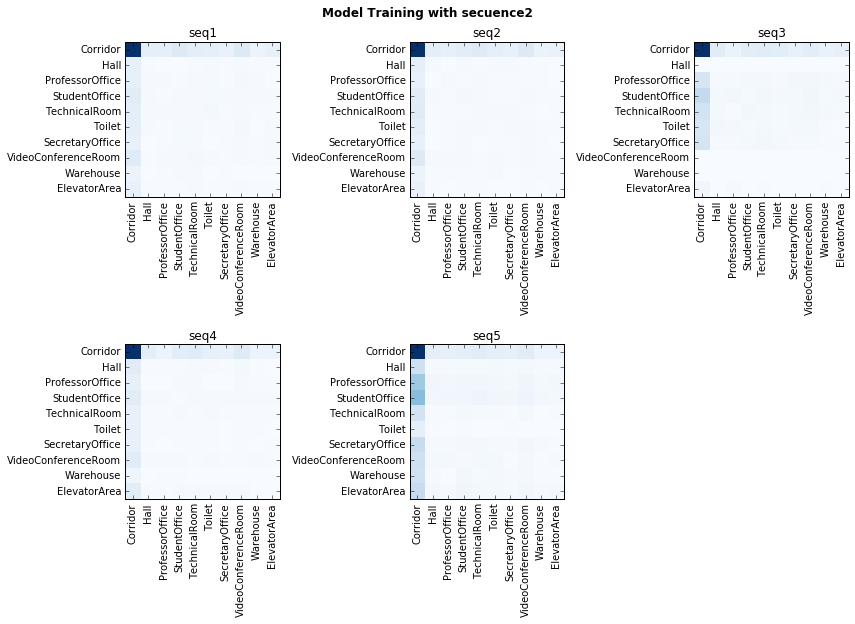

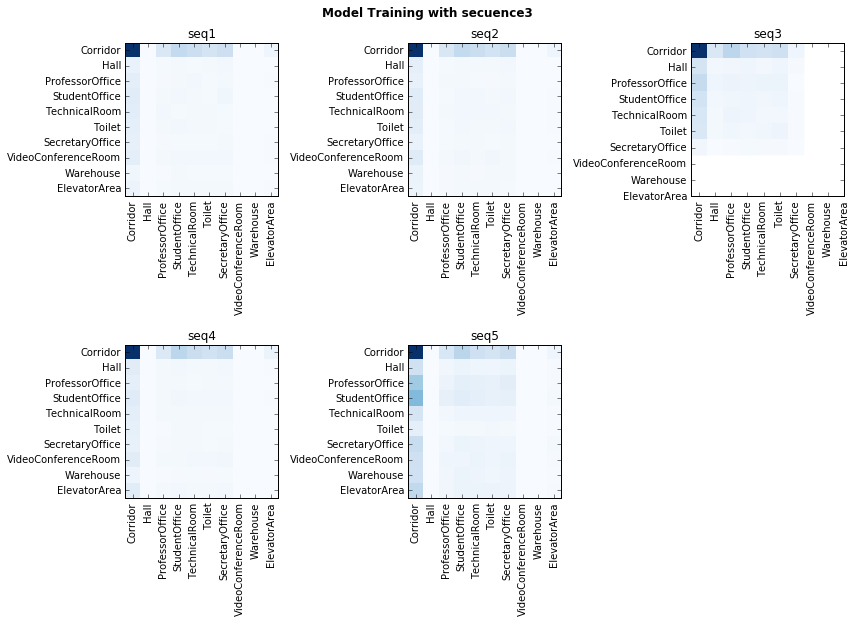

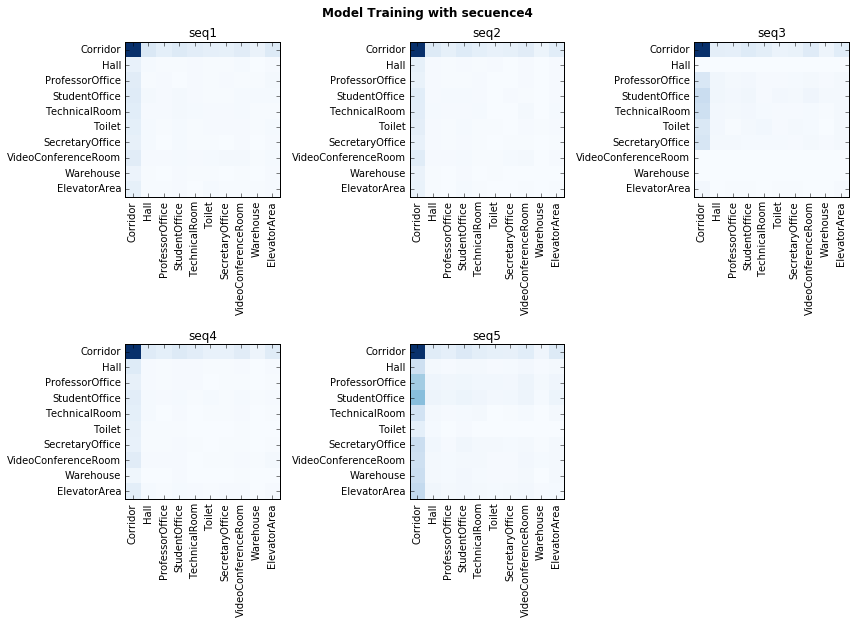

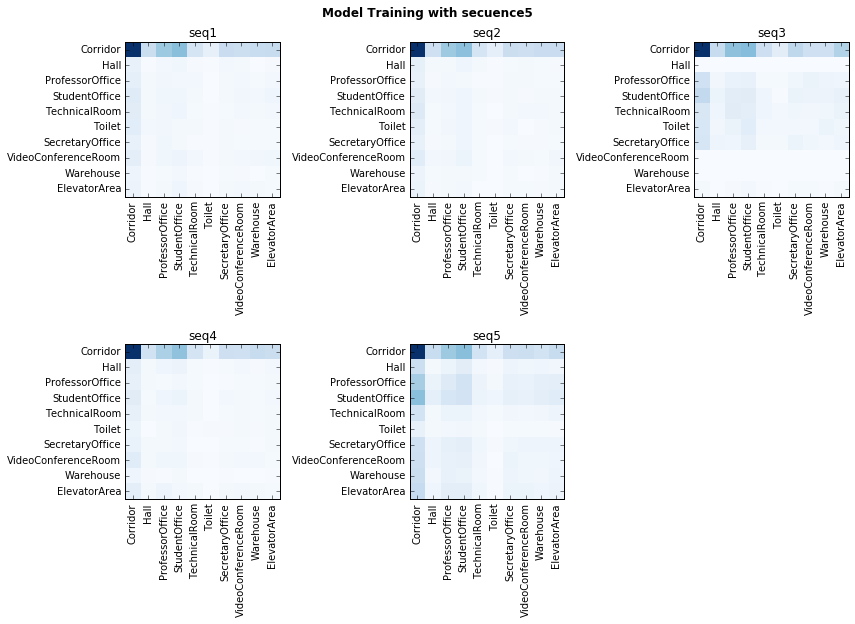

In [122]:


seq_model_label=['secuence1','secuence2','secuence3','secuence4','secuence5']
seq_dataset_label=['seq1','seq2','seq3','seq4','seq5']

evaluate(Y,seq_model_label,seq_dataset_label,class_labels)
